## **EMAIL SPAM FILTER**
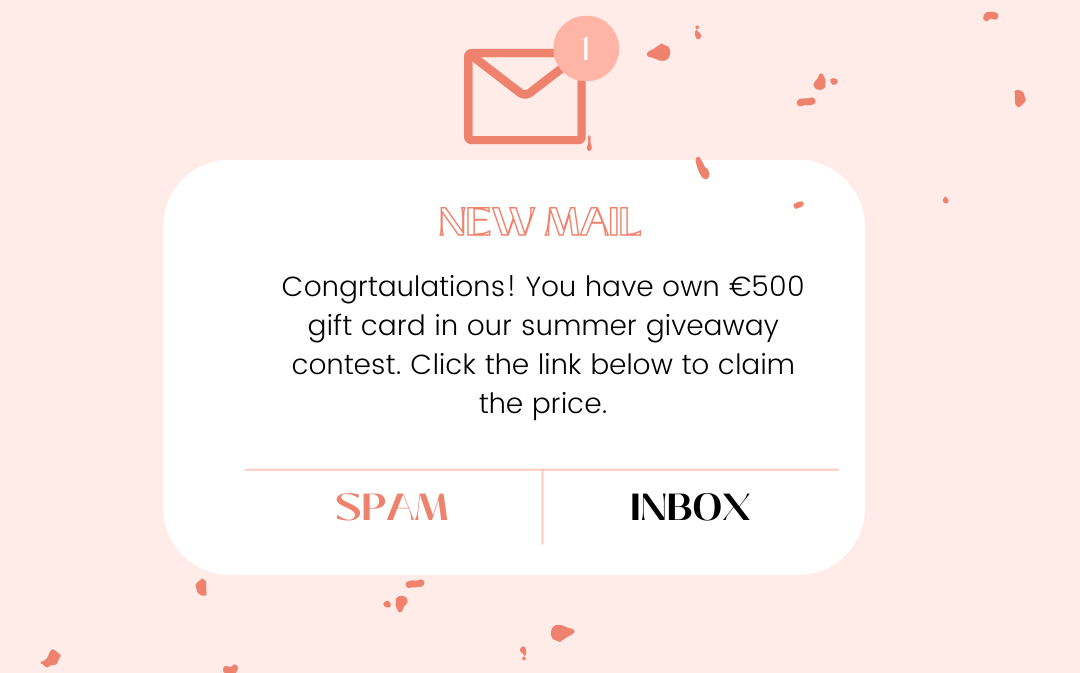

#**Problem Statement**

*   With the widespread use of email for communication, the issue of spam emails has become increasingly prevalent. Spam emails not only clutter users' inboxes but also pose security risks by spreading malware, phishing attempts, and fraudulent schemes. To mitigate these risks and improve user experience, there is a need for an efficient and reliable automated system capable of accurately identifying and filtering spam emails.
*   Develop a machine learning-based system to automatically detect spam emails in a given dataset

# **Objective**

The primary objective of this project is to build a robust spam detection model that can accurately classify emails as spam or legitimate (ham) based on their content and metadata.

# **Data Description**

The dataset consists of a collection of emails labeled as either spam or legitimate (ham). Each email sample is represented by features such as sender email address, subject line, email body content, and attachments. The dataset provides a balanced distribution of spam and ham emails, enabling the development of a model that can effectively differentiate between the two classes.

# **Project Work Flow**

**Data Wrangling:**

*   Load the dataset containing the "text" and "label" columns.
*   Understanding the data
*   Handle any missing values or duplicates if present.

**Exploratory Data Analysis (EDA):**


*   Perform basic exploratory analysis to understand the characteristics of the email text data.
*   Visualize the distribution of spam and ham emails using histograms or pie charts.
*   Explore the length of emails (number of characters or words) in each category.
*   Identify common keywords or phrases in spam and ham emails through word frequency analysis.

**Data Preprocessing:**

*   Convert text data to lowercase to ensure uniformity.
*   Remove any special characters, punctuation, and digits from the text.
*   Tokenize the text data into individual words or tokens.
*   Remove stop words (commonly occurring words like "and", "the", "is") to reduce noise.
*   Perform stemming or lemmatization to reduce words to their base or root form.

**Feature Engineering:**

*   Convert the preprocessed text data into numerical features that can be used by machine learning algorithms..
*   Explore feature representation techniques such as bag-of-words, TF-IDF (Term Frequency-Inverse Document Frequency), or word embeddings.
*   Vectorize the text data using the chosen feature representation technique.

**Splitting the Data:**
*   Split the dataset into training,and test sets. Typically, you might use a 70-30 or 80-20 split.
*   Ensure that the distribution of spam and ham emails is consistent across the splits.

**Model Building:**

*  Choose appropriate machine learning algorithms for classification, such as:
*   Naive Bayes (e.g., Multinomial Naive Bayes)
*   Support Vector Machines (SVM)
*   Decision Trees
*   Random Forests

**Model Evaluation:**

*  Evaluate the final model on the test set to obtain unbiased performance metrics.

**Result and Conclusion**


In [39]:
# You may need to install libraries
#! pip install pandas
#! pip install nltk
#! pip install scikit-learn

# Import libraries
import string
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import warnings
import plotly.express as px
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
warnings.simplefilter(action='ignore', category=FutureWarning)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### **`Data Wrangling`**

**Load the dataset**

In [2]:
#from google.colab import drive
#drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
#to import in collab
#Datafilepath='/content/drive/MyDrive/Dataset/emails.csv'
#data = pd.read_csv(Datafilepath)

In [ ]:
#Kaggle data
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
data_path = "/kaggle/input/nielsenhackathon/Hackathon_Working_Data.csv"
data = pd.read_csv(data_path)

In [4]:
spam_df = data.copy()
spam_df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


**Understanding the data**

`text :-`  Contains the subject of the email

`spam :-` contains binary values '0' indicating ham and '1' indicating spam

In [5]:
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


### **`Exploratory Data Analysis`**
*   Statistics Summary
*   Indentifying Missing values
*   Handling Missing values
*   Removing Duplicate records
*   Visualization




**Statistics Summary**

In [6]:
spam_df.describe().T

,count,mean,std,min,25%,50%,75%,max
spam,5728.0,0.238827,0.426404,0.0,0.0,0.0,0.0,1.0


In [7]:
spam_df.dtypes

text    object
spam     int64
dtype: object

In [8]:
len(spam_df['text'].unique())

5695

**Missing Values**



In [9]:
#Check Null values
spam_df.isnull().sum()

text    0
spam    0
dtype: int64

In [10]:
#To check if there are any missing values
is_any_missing_data=spam_df.isna().any().any()
is_any_missing_data

False

**`Note:`** There are no missing values

**Duplicate Records**



In [11]:
spam_df.duplicated().sum()

33

**`Note:`**  As we can see that there are 5728 records out of which 33 are duplicate records.

In [12]:
#Fetch all duplicate values
duplicate=spam_df[spam_df.duplicated(keep='last')]
duplicate.head()

,text,spam
1417,"Subject: day off tuesday stinson , i would l...",0
1508,Subject: re : enron weather research good aft...,0
1532,Subject: schedule and more . . dr . kaminski ...,0
1667,"Subject: re : summer work . . jinbaek , this...",0
1749,"Subject: term paper dr . kaminski , attached...",0


In [13]:
#Remove Duplicate Records
spam_df.drop_duplicates(inplace=True)
spam_df.duplicated().sum()

0

**Rename names columns for better use**

In [14]:
# Rename names columns
spam_df=spam_df.rename(columns={'spam':'label'})


In [15]:
spam_df["length"] = spam_df["text"].apply(len)
spam_df.sort_values(by='length', ascending=False).head(3)

,text,label,length
2650,Subject: from the enron india newsdesk - april...,0,43952
1380,Subject: from the enron india newsdesk - april...,0,43937
2338,Subject: from the enron india newsdesk - april...,0,31055


**Visualization**

In [16]:
counts = spam_df['label'].value_counts().reset_index()
counts.columns = ['Label', 'Count']
# Create a bar plot using Plotly Express
fig = px.bar(counts, x='Label', y='Count', color='Label')
fig.update_layout(title='Number of Spam and Ham Emails', xaxis_title='Label', yaxis_title='Count')
fig.update_xaxes(tickvals=[0, 1], ticktext=['Ham', 'Spam'])
fig.show()

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

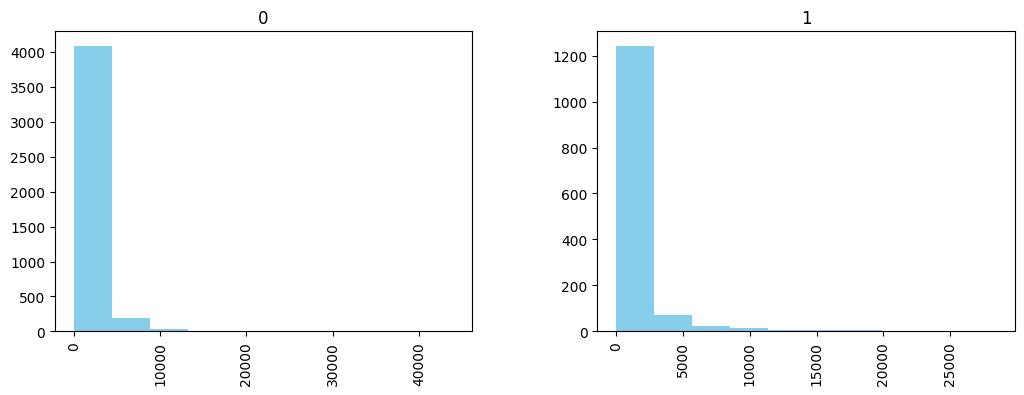

In [17]:
spam_df.hist(column = 'length', by ='label',figsize=(12,4), bins = 10,color='skyblue')

### **`Data preprocessing`**

1.   Remove punctuations
2.   Lowering the case
3.   Remove stop words
4.   Lemmatization
5.   Identify spam and ham words using N-gram model



In [18]:
def preprocess_text(text):
    # Remove punctuation
    no_punctuation = ''.join([char for char in text if char not in string.punctuation])

    # Lowercase the text
    no_punctuation_lower = no_punctuation.lower()

    # Tokenize the text into words
    words = nltk.word_tokenize(no_punctuation_lower)

    # Remove stopwords and non-alphabetic characters, and lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words if word.lower() not in stopwords.words('english') and word.isalpha()]

    # Join the lemmatized words back into a sentence
    lemmatized_text = ' '.join(lemmatized_words)

    return lemmatized_text


**1. Remove punctuations , 2. Lowering the case, 3. Identify and remove stop words and 4. Lemmatization**

In [19]:
spam_df["preprocessed_text"] = spam_df["text"].apply(preprocess_text)
spam_df.head()

,text,label,length,preprocessed_text
0,Subject: naturally irresistible your corporate...,1,1484,subject naturally irresistible corporate ident...
1,Subject: the stock trading gunslinger fanny i...,1,598,subject stock trading gunslinger fanny merrill...
2,Subject: unbelievable new homes made easy im ...,1,448,subject unbelievable new home made easy im wan...
3,Subject: 4 color printing special request add...,1,500,subject color printing special request additio...
4,"Subject: do not have money , get software cds ...",1,235,subject money get software cd software compati...


**`Note:`**  in the 2nd and 4th record, after applying lemmatization 'homes','cds' changes to thier root form 'home' and 'cd'

**N-Gram**

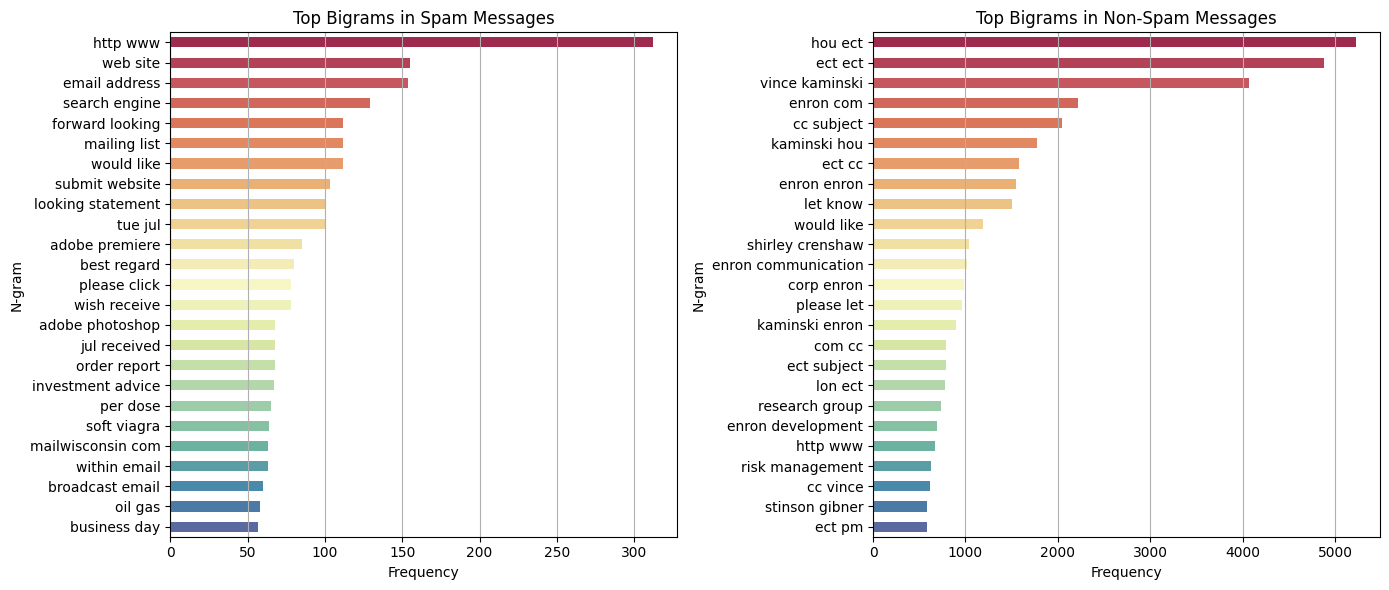

In [20]:
def plot_ngrams(ax, texts, ngram_range=(2, 2), num_top_ngrams=25, title=''):
    # Initialize count vectorizer
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    # Fit and transform the texts
    X = vectorizer.fit_transform(texts)
    # Get feature names
    feature_names = vectorizer.get_feature_names_out()
    # Sum the occurrences of each n-gram
    ngram_counts = X.sum(axis=0).A1
    # Create a dictionary of n-grams and their counts
    ngram_dict = dict(zip(feature_names, ngram_counts))
    # Sort the dictionary by counts in descending order
    sorted_ngrams = sorted(ngram_dict.items(), key=lambda x: x[1], reverse=True)
    # Select top N n-grams
    top_ngrams = sorted_ngrams[:num_top_ngrams]
    # Plot the top N n-grams
    sns.barplot(ax=ax, x=[ngram[1] for ngram in top_ngrams],
                y=[ngram[0] for ngram in top_ngrams],
                orient="h",
                width=0.5,
                palette='Spectral')
    ax.set_xlabel('Frequency')
    ax.set_ylabel('N-gram')
    ax.set_title(title)

# Filter spam and non-spam messages
spam_texts = spam_df[spam_df['label'] == 1]['preprocessed_text']
non_spam_texts = spam_df[spam_df['label'] == 0]['preprocessed_text']

#Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plot_ngrams(axes[0], spam_texts, title='Top Bigrams in Spam Messages')
plot_ngrams(axes[1], non_spam_texts, title='Top Bigrams in Non-Spam Messages')
axes[0].grid(axis='x')
axes[1].grid(axis='x')
plt.tight_layout()
plt.show()



### **`Feature Engineering`**

1.Count Vectorizer

2.TF-IDF Vectorizer (Term Frequency Inverse Document Frequency)

**1.Count Vectorizer**

Count Vectorizer is a simple method used to convert a collection of text documents into a matrix of token counts. It works by converting text documents into a sparse matrix representation where each row corresponds to a document, and each column corresponds to a unique word in the corpus (collection of documents). The value in each cell of the matrix represents the frequency of occurrence of the corresponding word in the corresponding document

**`fit_transform`** learns the vocabulary of the text data (i.e., all unique words) and transforms the text data into a sparse matrix representation called a bag-of-words (BoW) representation

In [21]:
# Initialize count vectorizer
vectorizer = CountVectorizer()
# Bag of words
bow_text = vectorizer.fit_transform(spam_df["preprocessed_text"])
# Fetch the vocabulary set
print(f"10 Bag Of Words Features: {vectorizer.get_feature_names_out()[100:110]}")
print(f"Total number of vocab words: {len(vectorizer.vocabulary_)}")


10 Bag Of Words Features: ['absorb' 'absorbing' 'absorbowac' 'absorbs' 'absorption' 'absoutely'
 'abspielt' 'abstained' 'abstract' 'abstractive']
Total number of vocab words: 30962


**`transform`**  only transforms the text data into BoW representation using the vocabulary learned during fitting. It does not re-learn the vocabulary.

In [22]:
# Convert strings to vectors using BoW
transformed_bow = vectorizer.transform(spam_df["preprocessed_text"])

# Print the shape of the sparse matrix and count the number of non-zero occurrences
print(f"Shape of sparse matrix: {transformed_bow.shape}")
print(f"Amount of non-zero occurrences: {transformed_bow.nnz}")


Shape of sparse matrix: (5695, 30962)
Amount of non-zero occurrences: 487517


**2. TF-IDF Vectorizer**

TF-IDF Vectorizer is another technique for text feature extraction, but it goes beyond simple word counts. It considers both the importance of a word within a document (term frequency) and its overall importance across the entire document collection (inverse document frequency).

**Term Frequency (TF):** Similar to CountVectorizer, TF-IDF calculates the frequency of each word in a document. However, it often normalizes this value by dividing by the document's total word count. This prevents documents with more words from getting higher weightage solely based on word count.

**Inverse Document Frequency (IDF):** IDF focuses on the significance of a word across the entire document collection. It downplays the importance of common words that appear frequently in many documents and emphasizes words that are unique or distinctive to a particular document

By multiplying TF and IDF scores for each word in a document, TF-IDF Vectorizer creates a weight that reflects a word's importance within a specific document relative to the entire document collection.

In [23]:
# TF-IDF
tfidf_transformer = TfidfTransformer().fit(transformed_bow)
# Transform entire BoW into tf-idf corpus
text_tfidf = tfidf_transformer.transform(transformed_bow)
print(text_tfidf.shape)

(5695, 30962)




### **`Model selction`**

1.   Split the data into train and test
2.   Classification Model
    *   Support vector machine (SVM) classification model
    *   Random Forest Classification Model
3.  Evaluate the model




**1.   Split the data into train and test**

In [24]:
# Split the dataset to train and test sets
x_train, x_test, y_train, y_test = train_test_split(
    text_tfidf, spam_df["label"], test_size=0.2
)

print(f"train dataset features size: {x_train.shape}")
print(f"train dataset label size: {y_train.shape}")

print(f"test dataset features size: {x_test.shape}")
print(f"test dataset label size: {y_test.shape}")

train dataset features size: (4556, 30962)
train dataset label size: (4556,)
test dataset features size: (1139, 30962)
test dataset label size: (1139,)


**2.  classification model**


1.   Initialize SVM model
2.   Train the SVM model
3.   Make predictions on the test data
4.   Confusion Matrix
5.   Evaluate the model





In [34]:
def evaluate_model(model, x_test, y_test, model_name="Model"):

  # Predict labels on testing data
  y_pred = model.predict(x_test)

  # Calculate confusion matrix
  conf_matrix = confusion_matrix(y_test, y_pred)

  # Extract TP, TN, FP, FN
  TN, FP, FN, TP = conf_matrix.ravel()

  # Calculate various performance metrics
  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  specificity = TN / (TN + FP)
  miss_rate = FN / (FN + TP)

  # Calculate mean accuracy using cross-validation
  mean_accuracy = cross_val_predict(model, x_train, y_train, cv=10).mean()

  # Calculate mean square error (for regression tasks, not applicable here)
  mse = mean_squared_error(y_test, y_pred)
  classification_rep = classification_report(y_test, y_pred, output_dict=True)
  metrics = {
        "Accuracy": accuracy,
        "Recall": recall,
        "Precision": precision,
        "F1-score": f1,
        "Specificity": specificity,
        "Miss Rate": miss_rate,
        "Mean Accuracy": mean_accuracy,
        "Mean Square Error": mse,
        "Classification Report": classification_rep
    }
  # Print evaluation metrics
  print(f"\033[1m EVALUATION METRICS ({model_name}) \033[0m")
  print(f"\n \033 ---------------------------------------------------------------- \033[0m")
  print("\nTrue Positives (TP):", TP)
  print("True Negatives (TN):", TN)
  print("False Positives (FP):", FP)
  print("False Negatives (FN):", FN)
  print("\nAccuracy   : ", accuracy)
  print("Recall       : ", recall)
  print("Precision    : ", precision)
  print("F1-score     : ", f1)
  print("Specificity  : ", specificity)
  print("Miss Rate    : ", miss_rate)
  print("Mean Accuracy: ", mean_accuracy)
  print("Mean Square Error:", mse)  # Not applicable for classification
  print(f" \033 ---------------------------------------------------------------- \033[0m")

  # Print classification report
  print("\033[1m Classification Report: \033[0m")
  print(classification_report(y_test, y_pred))
  print(f"\n \033 ---------------------------------------------------------------- \033[0m")
  print("\033[1m Confusion Matrix \033[0m")
  # Plot the confusion matrix
  disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
  disp.plot(cmap='bone_r')  # specify the colormap for better visualization
  plt.show()
  return metrics,y_pred

 EVALUATION METRICS (SVM) 

  ---------------------------------------------------------------- 

True Positives (TP): 259
True Negatives (TN): 869
False Positives (FP): 1
False Negatives (FN): 10

Accuracy   :  0.990342405618964
Recall       :  0.9628252788104089
Precision    :  0.9961538461538462
F1-score     :  0.9792060491493383
Specificity  :  0.9988505747126437
Miss Rate    :  0.03717472118959108
Mean Accuracy:  0.23046532045654083
Mean Square Error: 0.009657594381035996
  ---------------------------------------------------------------- 
 Classification Report: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       870
           1       1.00      0.96      0.98       269

    accuracy                           0.99      1139
   macro avg       0.99      0.98      0.99      1139
weighted avg       0.99      0.99      0.99      1139


  ---------------------------------------------------------------- 
 Confusion Matrix 


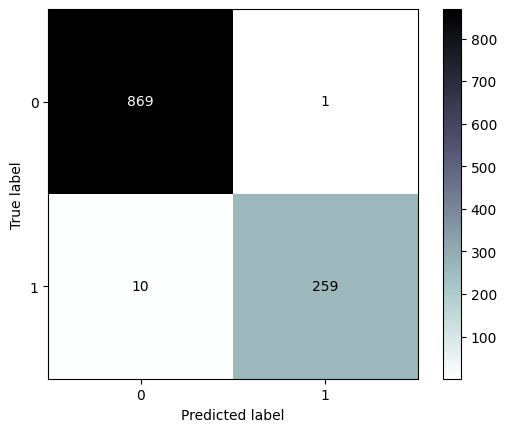

In [35]:
# Train SVM model
svm_model = SVC()
svm_model.fit(x_train, y_train)
# Evaluate SVM model
svm_metrics,y_pred_svm = evaluate_model(svm_model, x_test, y_test, model_name="SVM")

 EVALUATION METRICS (Random Forest) 

  ---------------------------------------------------------------- 

True Positives (TP): 252
True Negatives (TN): 868
False Positives (FP): 2
False Negatives (FN): 17

Accuracy   :  0.9833187006145742
Recall       :  0.9368029739776952
Precision    :  0.9921259842519685
F1-score     :  0.9636711281070746
Specificity  :  0.9977011494252873
Miss Rate    :  0.06319702602230483
Mean Accuracy:  0.21905179982440737
Mean Square Error: 0.016681299385425813
  ---------------------------------------------------------------- 
 Classification Report: 
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       870
           1       0.99      0.94      0.96       269

    accuracy                           0.98      1139
   macro avg       0.99      0.97      0.98      1139
weighted avg       0.98      0.98      0.98      1139


  ---------------------------------------------------------------- 
 Confusion Matri

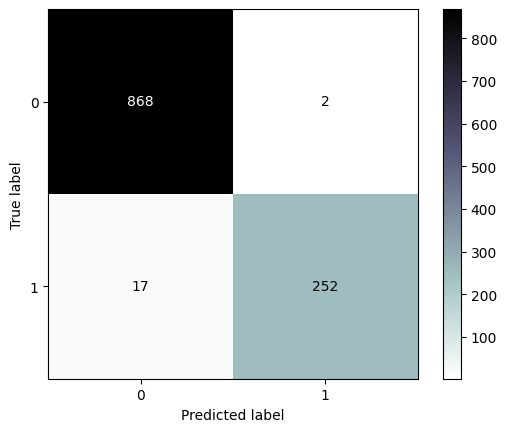

In [36]:
# Train Random Forest model
randomForest_model = RandomForestClassifier()
randomForest_model.fit(x_train, y_train)
# Evaluate Random Forest model
rf_metrics,y_pred_rf = evaluate_model(randomForest_model, x_test, y_test, model_name="Random Forest")

 EVALUATION METRICS (Decision Tree) 

  ---------------------------------------------------------------- 

True Positives (TP): 252
True Negatives (TN): 865
False Positives (FP): 5
False Negatives (FN): 17

Accuracy   :  0.9806848112379281
Recall       :  0.9368029739776952
Precision    :  0.980544747081712
F1-score     :  0.9581749049429658
Specificity  :  0.9942528735632183
Miss Rate    :  0.06319702602230483
Mean Accuracy:  0.24517120280948201
Mean Square Error: 0.019315188762071993
  ---------------------------------------------------------------- 
 Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       870
           1       0.98      0.94      0.96       269

    accuracy                           0.98      1139
   macro avg       0.98      0.97      0.97      1139
weighted avg       0.98      0.98      0.98      1139


  ---------------------------------------------------------------- 
 Confusion Matrix

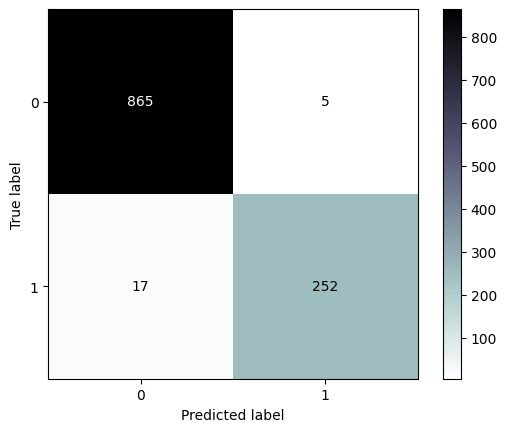

In [37]:
decisionTree_model = DecisionTreeClassifier()
decisionTree_model.fit(x_train, y_train)
dt_metrics,y_pred_dt = evaluate_model(decisionTree_model, x_test, y_test, model_name="Decision Tree")


 EVALUATION METRICS (Naive Bayes) 

  ---------------------------------------------------------------- 

True Positives (TP): 252
True Negatives (TN): 865
False Positives (FP): 5
False Negatives (FN): 17

Accuracy   :  0.9806848112379281
Recall       :  0.9368029739776952
Precision    :  0.980544747081712
F1-score     :  0.9581749049429658
Specificity  :  0.9942528735632183
Miss Rate    :  0.06319702602230483
Mean Accuracy:  0.24341527655838455
Mean Square Error: 0.019315188762071993
  ---------------------------------------------------------------- 
 Classification Report: 
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       870
           1       0.98      0.94      0.96       269

    accuracy                           0.98      1139
   macro avg       0.98      0.97      0.97      1139
weighted avg       0.98      0.98      0.98      1139


  ---------------------------------------------------------------- 
 Confusion Matrix 


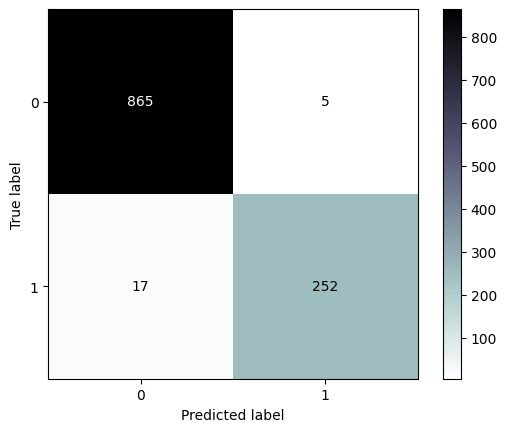

In [42]:
NaiveBayes_model = GaussianNB()
NaiveBayes_model.fit(x_train.toarray(), y_train)
nb_metrics,y_pred_nb = evaluate_model(decisionTree_model, x_test.toarray(), y_test, model_name="Naive Bayes")

In [44]:
svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)
rf_fpr, rf_tpr, threshold = roc_curve(y_test, y_pred_rf)
auc_rfc = auc(rf_fpr, rf_tpr)
dt_fpr, dt_tpr, threshold = roc_curve(y_test, y_pred_dt)
auc_rfc = auc(dt_fpr, dt_tpr)
nb_fpr, nb_tpr, threshold = roc_curve(y_test, y_pred_nb)
auc_rfc = auc(nb_fpr, nb_tpr)

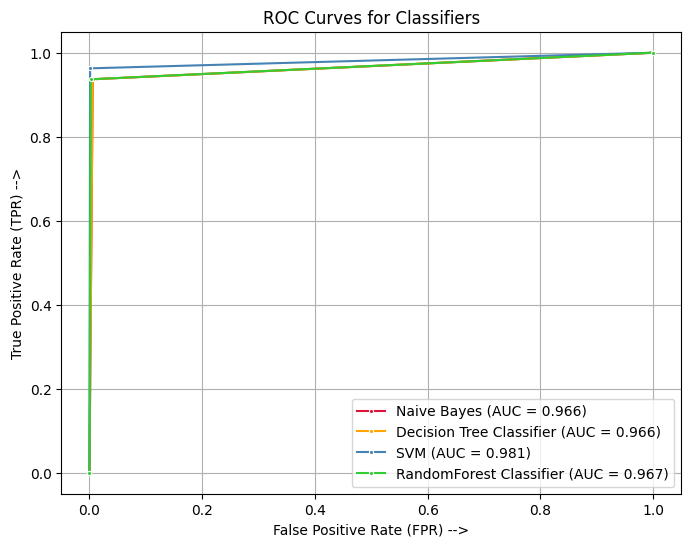

In [68]:
classifiers = {
    'Naive Bayes': (y_pred_nb, nb_fpr, nb_tpr),
    'Decision Tree Classifier': (y_pred_dt, dt_fpr, dt_tpr),
    'SVM': (y_pred_svm, svm_fpr, svm_tpr),
    'RandomForest Classifier': (y_pred_rf, rf_fpr, rf_tpr)
}

plt.figure(figsize=(8, 6), dpi=100)
colors=['crimson','orange','steelblue','limegreen']


for i, (clf_name, (y_pred, fpr, tpr)) in enumerate(classifiers.items()):
    auc_score = roc_auc_score(y_test, y_pred)  # Calculate AUC score using roc_auc_score
    sns.lineplot(x=fpr, y=tpr, marker='.', label=f'{clf_name} (AUC = {auc_score:.3f})', color=colors[i])

# Loop through classifiers and plot ROC curves
#for clf_name, (y_pred, fpr, tpr) in classifiers.items():
#    auc_score = roc_auc_score(y_test, y_pred)  # Calculate AUC score using roc_auc_score
#    sns.lineplot(x=fpr, y=tpr, marker='.', label=f'{clf_name} (AUC = {auc_score:.3f})')  # Use seaborn lineplot

# plot
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Classifiers')
plt.grid(True)
plt.legend()
plt.show()


### **`Model performance comparison`**

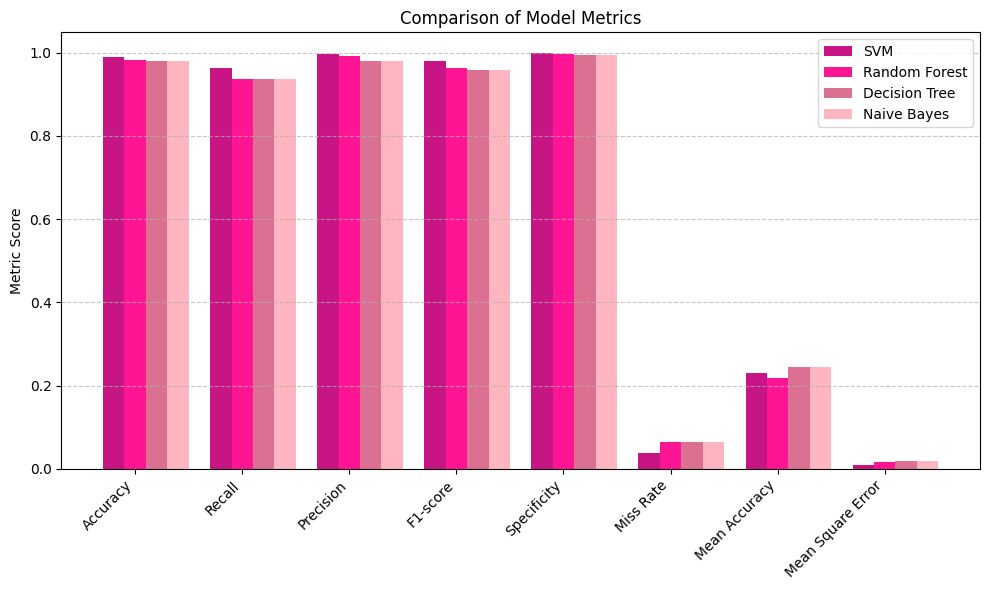

In [59]:
# Extract metric names and values
metric_names = list(svm_metrics.keys())
svm_values = [svm_metrics[key] for key in metric_names if key != 'Classification Report']
rf_values = [rf_metrics[key] for key in metric_names if key != 'Classification Report']
dt_values = [dt_metrics[key] for key in metric_names if key != 'Classification Report']
nb_values = [nb_metrics[key] for key in metric_names if key != 'Classification Report']

length = len(metric_names)

# Create a bar chart
plt.figure(figsize=(10, 6))
x = np.arange(length)
width = 0.2

# Plot comparison
#plt.bar(x, svm_values, width, label='SVM', color='darkolivegreen')
#plt.bar(x + width, rf_values, width, label='Random Forest', color='limegreen')
# Plot bars for each model
plt.bar(x - width, svm_values, width, label='SVM', color='mediumvioletred')
plt.bar(x, rf_values, width, label='Random Forest', color='deeppink')
plt.bar(x + width, dt_values, width, label='Decision Tree', color='palevioletred')
plt.bar(x + 2*width, nb_values, width, label='Naive Bayes', color='lightpink')


plt.xticks(x, [name for name in metric_names if name != 'Classification Report'], rotation=45, ha='right')
plt.ylabel('Metric Score')
plt.title('Comparison of Model Metrics')
plt.legend()

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### **`Result:`**
This analysis evaluated four classification models (Naive Bayes, Decision Tree, SVM, and Random Forest) for their performance on a binary classification task. All models achieved high accuracy, with SVM achieving the highest (0.9903) followed by Random Forest (0.9833), Naive Bayes and Decision Tree (both at 0.9807).

In terms of AUC (Area Under the ROC Curve), SVM again emerged as the leader (0.981), followed by Decision Tree and Random Forest (both at 0.966), and lastly Naive Bayes (0.966).


### **`Conclusion:`**
Based on the evaluation results, **SVM classification model** appears to be the best performing model overall, achieving the highest accuracy and AUC. However, the differences in performance between the models are relatively small